In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("D:\d Documents\datasets for practice\minwage.csv")

act_min_wage = pd.DataFrame()

# we can iterate over all the groups too
for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018" : name})
    
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018" : name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis = 1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [2]:
import matplotlib.pyplot as plt
#plt.matshow()

### as you can see, you get a graph but it's not very informative. Colours are abit weird. The labels are numbers as compared to the names of the state!

to change the plot you need to have an axis to modify <br>
to do that you need to have a subplot to modify <br>
to do that you need to have a figure to modify <br>

so create figure -> subplot -> axis -> modify plot!



<function matplotlib.pyplot.show(*args, **kw)>

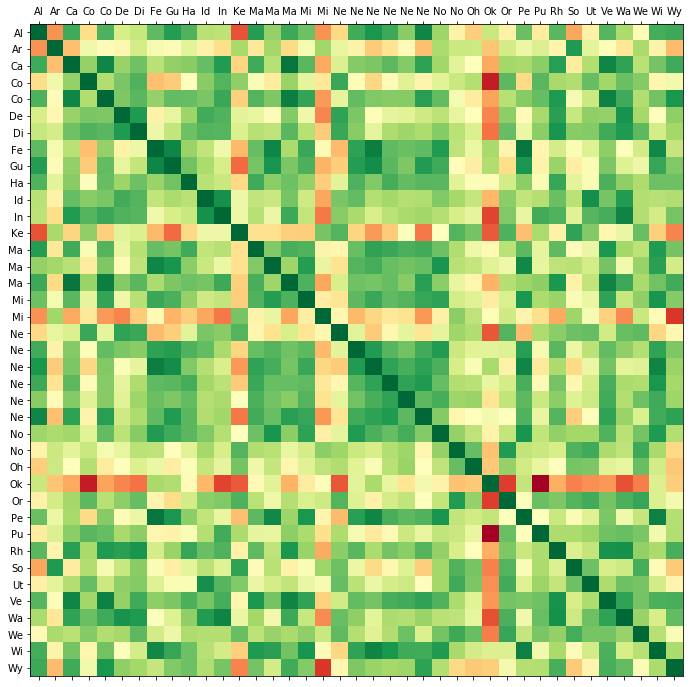

In [17]:
# returns an array of the names of each state but only the first 2 letters!
labels = [c[:2] for c in min_wage_corr.columns]

# 1. create figure
fig = plt.figure(figsize=(12,12))
# returns: <Figure size 864x864 with 0 Axes>

# 2. create subplot
ax = fig.add_subplot(111) # all subplots are in 1 by 1 grid, and there is only 1 graph
# returns a blank 1 x 1 grid

# 3 and 4. we create axis by creating subplot. Thus we can now edit the plot!
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn) # colour map is red yellow green
# returns a heatmap, axis is still 0 to 1

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# this will ensure that ALL the labels are shown, otherwise, they will only show a few to minimise cluttering!

# change the labels!
ax.set_xticklabels(labels) # weird texts will return when you do this, but you can ignore them
ax.set_yticklabels(labels) # same for this too
# this will actually return the heatmap with names, but it will also include the weird text above

plt.show
# show you your final plot

### note that ax.matshow() kinda resets our modification to labels. Thus, if you think your code is correct but pictures are not showing correctly, try and move around the code. Below is an example of a mistake.

In [18]:
## correct way (same as above)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))


# wrong way (plot will not show all the names!)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

In [19]:
labels

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Fe',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Pu',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

### as you can see our labels are abit off. Some states have the same first 2 chars ie New Jersey and New York

### we can resolve this by hardcoding ie rename each state by ourselves, but we are programmers. There should be a better way

### we can find data online to map the names to the states! Let's do that!

## Scraping data from websites using Pandas

### some sites may not allow you to take data from their sites (they actively decline access to robots). We can work through that but to be nice, let's find a site that actually accepts robots
 

In [20]:
import pandas as pandas

dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes") # dont run this first

# we need lxml html5lib bs4 so use pip first!
# also install requests even if you are not on a company computer
# mac needs extra command, go to pythonprogramming for more info

### sentdex has this error: URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:581)>

### here's how he solved it. You don't have to use this though, as yours was fine.

In [21]:
### python does not have multi line commenting!!

# import requests
# web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes") # you can also put verify = False if you still get errors!
# dfs = pd.read_html(web.text)

In [23]:
for df in dfs:
    print(df.head())

State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


### read_html() will parse the site and RETURN A LIST OF DATAFRAMES! hence dfs...

### the site has 2 dfs, we are interested in the 

In [24]:
for df in dfs:
    print(df.head())

State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [49]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### Let's save this data to csv. Just in case the site no longers gives us access

### when you save to csv, pandas believes your index is meaningful. ie index = True.

### if you keep rerunning the notebook ie saving to_csv and read_csv, the index might keep increasing. Here are 2 ways to solve it

### play with the 2 parameters to see how it affects the indexes!

In [59]:
state_abbv.to_csv("D:\d Documents\datasets for practice\state_abbv.csv", index = False) 
# stops pandas from thinking that the index is meaningful
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [60]:
state_abbvTest = pd.read_csv("D:\d Documents\datasets for practice\state_abbv.csv", index_col=0)
# chooses which column is the index
state_abbvTest.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


### as you can see from the state abbv df, we want the state name and the postal code. We will convert this to a dictionary!

### if your index is the regular numbers, this would link (each number to a postal code) instead of (each state to a postal code)!!

In [76]:
state_abbv = pd.read_csv("D:\d Documents\datasets for practice\state_abbv.csv", index_col=0)
state_abbv

abbv_dict = state_abbv[["Postal Code"]].to_dict()
abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

### be aware: the dictionary we want is actually inside the Postal Code dictionary!! Fix this

In [81]:
# abbv_dict = abbv_dict["Postal Code"] # run this only once!!

abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [82]:
# labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Federal (FLSA)'

### there is an error because some names are not inside our dictionary!! eg Guam, FLSA, and Puerto Rico which are American territories, but not states.

### this is where we will hardcode by adding these countries in by hand

In [86]:
abbv_dict['Federal (FLSA)'] = "FLSA"
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]
# for each COL (ie state name) in min_wage_corr, get the val from the dictionary using COL as the KEY!

### now finally:

<function matplotlib.pyplot.show(*args, **kw)>

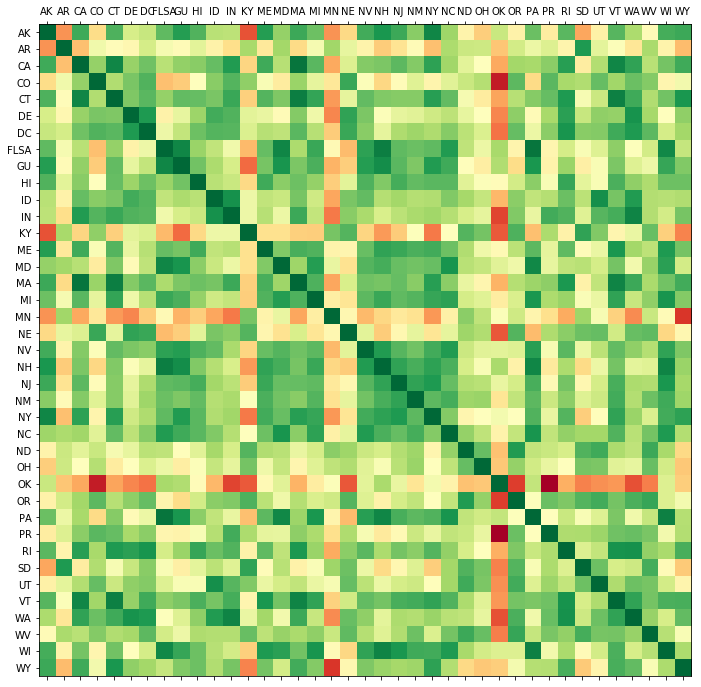

In [87]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show
